#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, cross_val_predict, RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.impute import KNNImputer
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from statistics import mean

import warnings
warnings.filterwarnings('ignore')

#### Reading the File

In [2]:
df = pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [3]:
df.head()     # top 5 columns

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.tail()    # last 5 columns

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN


In [5]:
df.shape    # no. of columns and rows

(14204, 12)

In [6]:
df.dtypes    # datatypes of data

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
df.info()     # info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [8]:
for i in df.columns:
    if df[i].dtypes == 'object' or 'numerical':
        print('\n\nValue counts of ',i,'is :')
        print(df[i].value_counts())
    else:
        continue



Value counts of  Item_Identifier is :
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64


Value counts of  Item_Weight is :
17.600    163
12.150    154
10.500    147
15.100    137
13.650    136
         ... 
7.640       8
5.210       8
9.035       7
4.615       7
7.850       7
Name: Item_Weight, Length: 415, dtype: int64


Value counts of  Item_Fat_Content is :
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


Value counts of  Item_Visibility is :
0.064709    269
0.074402    252
0.082291    148
0.063595    112
0.064299     98
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13010, dtype: int64


Value counts of  Item_Type is :
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy       

#### Converting non-numberic labeled column into categorical column

In [9]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = df[i].astype('category')
    else:
        continue

#### Converting categorical column into numerical column by using Label Encoder

In [10]:
label_encoder = preprocessing.LabelEncoder()

for i in df.columns:
    if df[i].dtypes == 'category':
        df[i + '_encode'] = label_encoder.fit_transform(df[i])
        print('\n',i+'_encode has unique values :',df[i + '_encode'].unique())
    else:
        continue


 Item_Identifier_encode has unique values : [ 156    8  662 ... 1323 1524 1519]

 Item_Fat_Content_encode has unique values : [0 1]

 Item_Type_encode has unique values : [ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]

 Outlet_Identifier_encode has unique values : [9 3 0 1 5 7 2 8 6 4]

 Outlet_Size_encode has unique values : [1 0 2]

 Outlet_Location_Type_encode has unique values : [0 2 1]

 Outlet_Type_encode has unique values : [1 2 0 3]


#### Defining method to perform data scaling operation based on the type of scaling

In [11]:
def feature_scale(scale):
    numerics = ['int16','int32','int64','float16','float32','float64']
    new_df = df.select_dtypes(include = numerics)
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(new_df.to_numpy()), columns = new_df.columns)
    return df_scaled

# Scaling the data using MinMaxScaling process
data_df_scaled = feature_scale('minmax')
data_df_scaled

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encode,Item_Fat_Content_encode,Item_Type_encode,Outlet_Identifier_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
0,0.282525,0.038399,0.927507,0.583333,0.283587,0.100128,0.0,0.266667,1.000000,0.5,0.0,0.333333
1,0.081274,0.048346,0.072068,1.000000,0.031419,0.005135,1.0,0.933333,0.333333,0.5,1.0,0.666667
2,0.770765,0.040593,0.468288,0.583333,0.158115,0.424904,0.0,0.666667,1.000000,0.5,0.0,0.333333
3,0.871986,0.218055,0.640093,0.541667,0.053555,0.719512,1.0,0.400000,0.000000,0.5,1.0,0.000000
4,0.260494,0.186950,0.095805,0.083333,0.073651,0.832478,0.0,0.600000,0.111111,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.353974,0.030546,0.467004,0.500000,NaN,0.149551,1.0,0.866667,0.888889,1.0,0.0,0.333333
14200,0.181304,0.429216,0.585126,1.000000,NaN,0.197689,1.0,1.000000,0.333333,0.5,1.0,0.666667
14201,0.324204,0.215364,0.371199,0.708333,NaN,0.915276,0.0,0.533333,0.777778,1.0,0.5,0.333333
14202,0.639774,0.188211,0.778154,0.916667,NaN,0.334403,1.0,0.200000,0.222222,1.0,0.5,0.333333


In [12]:
data_df_scaled.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encode,Item_Fat_Content_encode,Item_Type_encode,Outlet_Identifier_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,0.490526,0.205427,0.465686,0.534612,0.164551,0.500766,0.353351,0.481958,0.524719,0.694241,0.556428,0.400427
std,0.276970,0.149688,0.263529,0.348819,0.130729,0.288588,0.478027,0.280898,0.315233,0.337738,0.406378,0.265514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247395,0.091032,0.266224,0.083333,0.061359,0.250963,0.000000,0.266667,0.222222,0.500000,0.000000,0.333333
50%,0.479012,0.180940,0.470958,0.583333,0.134908,0.501926,0.000000,0.400000,0.555556,0.500000,0.500000,0.333333
75%,0.726109,0.278504,0.656055,0.791667,0.235030,0.750321,1.000000,0.666667,0.777778,1.000000,1.000000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.isnull().sum()

Item_Identifier                   0
Item_Weight                       0
Item_Fat_Content                  0
Item_Visibility                   0
Item_Type                         0
Item_MRP                          0
Outlet_Identifier                 0
Outlet_Establishment_Year         0
Outlet_Size                       0
Outlet_Location_Type              0
Outlet_Type                       0
Item_Outlet_Sales              5681
Item_Identifier_encode            0
Item_Fat_Content_encode           0
Item_Type_encode                  0
Outlet_Identifier_encode          0
Outlet_Size_encode                0
Outlet_Location_Type_encode       0
Outlet_Type_encode                0
dtype: int64

#### Filling null values

In [14]:
imp = KNNImputer(n_neighbors = 5)
data = imp.fit_transform(data_df_scaled)
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.282525,0.038399,0.927507,0.583333,0.283587,0.100128,0.0,0.266667,1.000000,0.5,0.0,0.333333
1,0.081274,0.048346,0.072068,1.000000,0.031419,0.005135,1.0,0.933333,0.333333,0.5,1.0,0.666667
2,0.770765,0.040593,0.468288,0.583333,0.158115,0.424904,0.0,0.666667,1.000000,0.5,0.0,0.333333
3,0.871986,0.218055,0.640093,0.541667,0.053555,0.719512,1.0,0.400000,0.000000,0.5,1.0,0.000000
4,0.260494,0.186950,0.095805,0.083333,0.073651,0.832478,0.0,0.600000,0.111111,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.353974,0.030546,0.467004,0.500000,0.110884,0.149551,1.0,0.866667,0.888889,1.0,0.0,0.333333
14200,0.181304,0.429216,0.585126,1.000000,0.171784,0.197689,1.0,1.000000,0.333333,0.5,1.0,0.666667
14201,0.324204,0.215364,0.371199,0.708333,0.138182,0.915276,0.0,0.533333,0.777778,1.0,0.5,0.333333
14202,0.639774,0.188211,0.778154,0.916667,0.433939,0.334403,1.0,0.200000,0.222222,1.0,0.5,0.333333


In [15]:
data_df_scaled.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Identifier_encode', 'Item_Fat_Content_encode', 'Item_Type_encode',
       'Outlet_Identifier_encode', 'Outlet_Size_encode',
       'Outlet_Location_Type_encode', 'Outlet_Type_encode'],
      dtype='object')

In [16]:
data.columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                'Outlet_Establishment_Year', 'Item_Outlet_Sales', 
                'Item_Identifier_encode', 'Item_Fat_Content_encode',
                'Item_Type_encode', 'Outlet_Identifier_encode', 
                'Outlet_Size_encode', 'Outlet_Location_Type_encode', 
                'Outlet_Type_encode']
data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encode,Item_Fat_Content_encode,Item_Type_encode,Outlet_Identifier_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
0,0.282525,0.038399,0.927507,0.583333,0.283587,0.100128,0.0,0.266667,1.000000,0.5,0.0,0.333333
1,0.081274,0.048346,0.072068,1.000000,0.031419,0.005135,1.0,0.933333,0.333333,0.5,1.0,0.666667
2,0.770765,0.040593,0.468288,0.583333,0.158115,0.424904,0.0,0.666667,1.000000,0.5,0.0,0.333333
3,0.871986,0.218055,0.640093,0.541667,0.053555,0.719512,1.0,0.400000,0.000000,0.5,1.0,0.000000
4,0.260494,0.186950,0.095805,0.083333,0.073651,0.832478,0.0,0.600000,0.111111,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.353974,0.030546,0.467004,0.500000,0.110884,0.149551,1.0,0.866667,0.888889,1.0,0.0,0.333333
14200,0.181304,0.429216,0.585126,1.000000,0.171784,0.197689,1.0,1.000000,0.333333,0.5,1.0,0.666667
14201,0.324204,0.215364,0.371199,0.708333,0.138182,0.915276,0.0,0.533333,0.777778,1.0,0.5,0.333333
14202,0.639774,0.188211,0.778154,0.916667,0.433939,0.334403,1.0,0.200000,0.222222,1.0,0.5,0.333333


In [17]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encode,Item_Fat_Content_encode,Item_Type_encode,Outlet_Identifier_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,0.490526,0.205427,0.465686,0.534612,0.164230,0.500766,0.353351,0.481958,0.524719,0.694241,0.556428,0.400427
std,0.276970,0.149688,0.263529,0.348819,0.120621,0.288588,0.478027,0.280898,0.315233,0.337738,0.406378,0.265514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247395,0.091032,0.266224,0.083333,0.069673,0.250963,0.000000,0.266667,0.222222,0.500000,0.000000,0.333333
50%,0.479012,0.180940,0.470958,0.583333,0.143323,0.501926,0.000000,0.400000,0.555556,0.500000,0.500000,0.333333
75%,0.726109,0.278504,0.656055,0.791667,0.231317,0.750321,1.000000,0.666667,0.777778,1.000000,1.000000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
data.isnull().sum()

Item_Weight                    0
Item_Visibility                0
Item_MRP                       0
Outlet_Establishment_Year      0
Item_Outlet_Sales              0
Item_Identifier_encode         0
Item_Fat_Content_encode        0
Item_Type_encode               0
Outlet_Identifier_encode       0
Outlet_Size_encode             0
Outlet_Location_Type_encode    0
Outlet_Type_encode             0
dtype: int64

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>,
        <AxesSubplot:title={'center':'Item_MRP'}>],
       [<AxesSubplot:title={'center':'Outlet_Establishment_Year'}>,
        <AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:title={'center':'Item_Identifier_encode'}>],
       [<AxesSubplot:title={'center':'Item_Fat_Content_encode'}>,
        <AxesSubplot:title={'center':'Item_Type_encode'}>,
        <AxesSubplot:title={'center':'Outlet_Identifier_encode'}>],
       [<AxesSubplot:title={'center':'Outlet_Size_encode'}>,
        <AxesSubplot:title={'center':'Outlet_Location_Type_encode'}>,
        <AxesSubplot:title={'center':'Outlet_Type_encode'}>]],
      dtype=object)

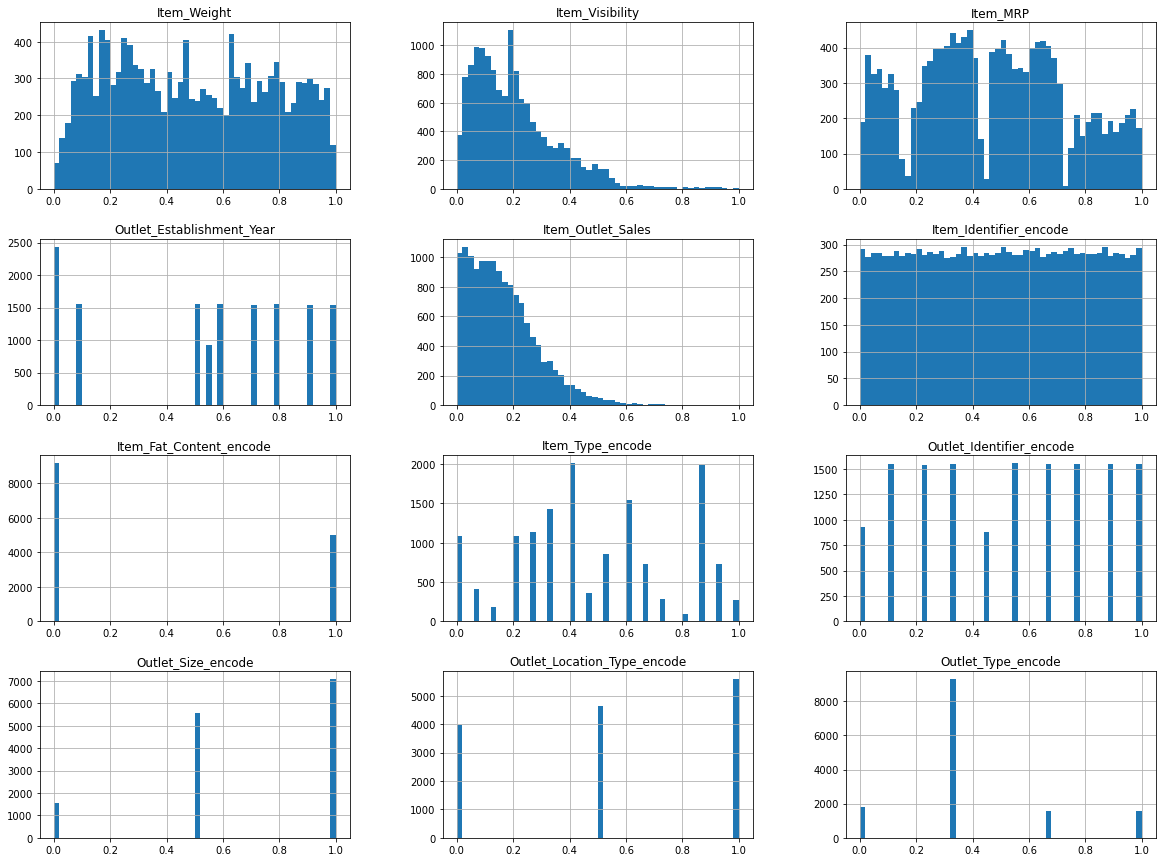

In [19]:
data.hist(bins = 50, figsize = (20,15))

In [20]:
cor = data.corr()
cor['Item_Outlet_Sales'].sort_values()

Item_Visibility               -0.143507
Outlet_Size_encode            -0.066743
Outlet_Establishment_Year     -0.058413
Item_Identifier_encode         0.007632
Item_Fat_Content_encode        0.010720
Item_Weight                    0.022090
Item_Type_encode               0.028574
Outlet_Location_Type_encode    0.096322
Outlet_Identifier_encode       0.175470
Outlet_Type_encode             0.439922
Item_MRP                       0.588174
Item_Outlet_Sales              1.000000
Name: Item_Outlet_Sales, dtype: float64

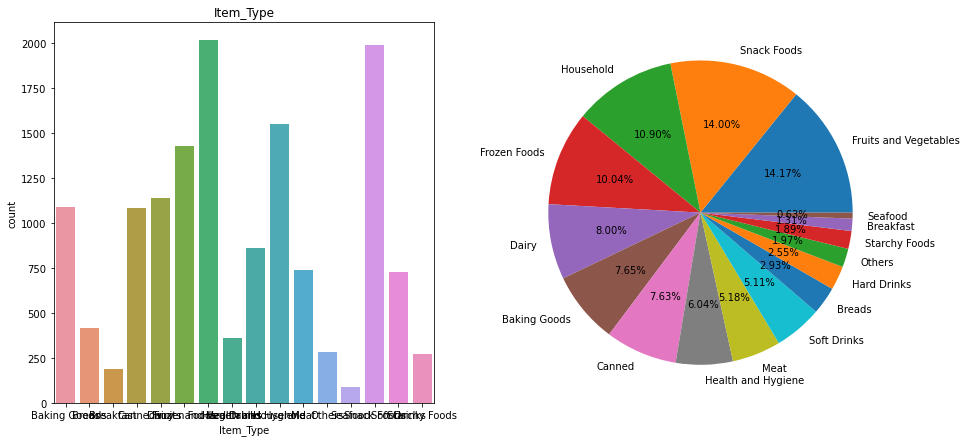

In [74]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Item_Type")    
plt.xticks(rotation = 90)      
percentage = df["Item_Type"].value_counts()         
labels = list(df["Item_Type"].value_counts().index) 

plt.xticks(rotation = 45)
sns.countplot(x = df["Item_Type"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales'>

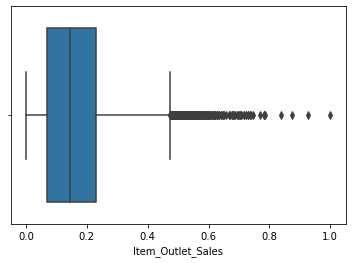

In [22]:
sns.boxplot(x=data['Item_Outlet_Sales'])

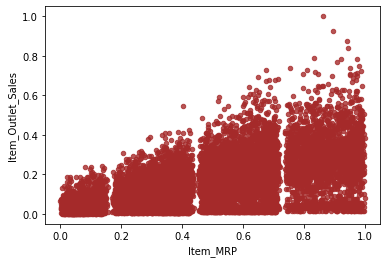

In [23]:
data.plot(kind = 'scatter', x = 'Item_MRP', y = 'Item_Outlet_Sales', alpha = 0.8, color = 'brown');

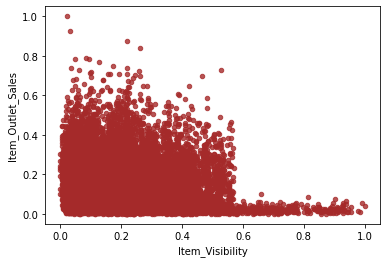

In [24]:
data.plot(kind = 'scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', alpha = 0.8, color = 'brown');

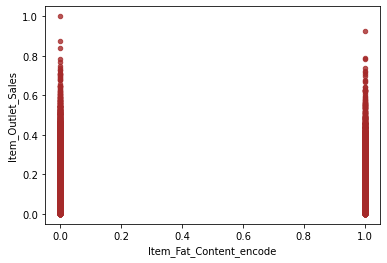

In [25]:
data.plot(kind = 'scatter', x = 'Item_Fat_Content_encode', y = 'Item_Outlet_Sales', alpha = 0.8, color = 'brown');

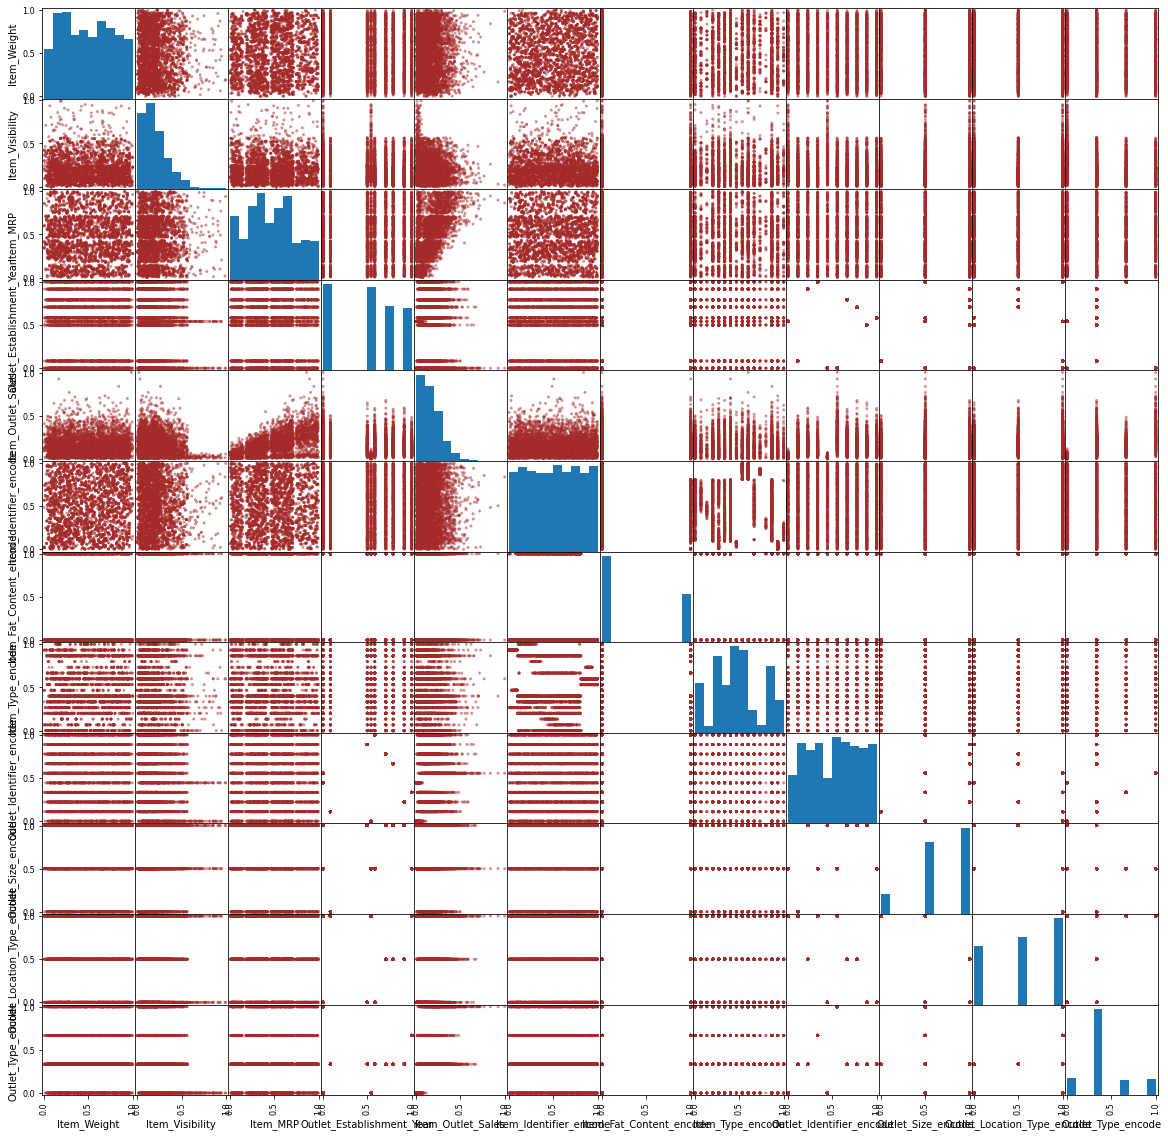

In [26]:
pd.plotting.scatter_matrix(data.sample(4000), figsize = (20,20), color = 'brown')
plt.show()

In [27]:
cor = data.corr()
cor['Item_Outlet_Sales'].sort_values()

Item_Visibility               -0.143507
Outlet_Size_encode            -0.066743
Outlet_Establishment_Year     -0.058413
Item_Identifier_encode         0.007632
Item_Fat_Content_encode        0.010720
Item_Weight                    0.022090
Item_Type_encode               0.028574
Outlet_Location_Type_encode    0.096322
Outlet_Identifier_encode       0.175470
Outlet_Type_encode             0.439922
Item_MRP                       0.588174
Item_Outlet_Sales              1.000000
Name: Item_Outlet_Sales, dtype: float64

In [28]:
df_new = data[['Item_Visibility','Outlet_Identifier_encode','Outlet_Type_encode','Item_MRP','Item_Outlet_Sales']]
df_new

,Item_Visibility,Outlet_Identifier_encode,Outlet_Type_encode,Item_MRP,Item_Outlet_Sales
0,0.038399,1.000000,0.333333,0.927507,0.283587
1,0.048346,0.333333,0.666667,0.072068,0.031419
2,0.040593,1.000000,0.333333,0.468288,0.158115
3,0.218055,0.000000,0.000000,0.640093,0.053555
4,0.186950,0.111111,0.333333,0.095805,0.073651
...,...,...,...,...,...
14199,0.030546,0.888889,0.333333,0.467004,0.110884
14200,0.429216,0.333333,0.666667,0.585126,0.171784
14201,0.215364,0.777778,0.333333,0.371199,0.138182
14202,0.188211,0.222222,0.333333,0.778154,0.433939


#### Splitting the Data

In [29]:
X = df_new.iloc[:,[0,1,2,3]].values
Y = df_new.iloc[:,-1].values
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

[[0.03839895 1.         0.33333333 0.92750715]
 [0.04834585 0.33333333 0.66666667 0.0720684 ]
 [0.04059334 1.         0.33333333 0.46828841]
 ...
 [0.21536442 0.77777778 0.33333333 0.37119946]
 [0.18821143 0.22222222 0.33333333 0.77815384]
 [0.31139284 0.77777778 0.33333333 0.20588425]]
[0.28358666 0.03141895 0.15811486 ... 0.13818219 0.43393859 0.07239621]


In [30]:
print('The X train value is :',X_train)
print('\nThe X test value is :',X_test)
print('\nThe Y train value is :',Y_train)
print('\nThe Y test value is :',Y_test)

The X train value is : [[0.23551132 0.77777778 0.33333333 0.83580194]
 [0.53801275 0.77777778 0.33333333 0.53157746]
 [0.47257783 1.         0.33333333 0.57452597]
 ...
 [0.12231946 1.         0.33333333 0.27187621]
 [0.1073689  0.11111111 0.33333333 0.00297116]
 [0.11631397 1.         0.33333333 0.63995935]]

The X test value is : [[0.53082575 0.88888889 0.33333333 0.81828739]
 [0.15814006 0.11111111 0.33333333 0.33589108]
 [0.09108448 1.         0.33333333 0.3748854 ]
 ...
 [0.21805488 0.33333333 0.66666667 0.07560917]
 [0.24234161 0.44444444 0.         0.03519633]
 [0.22694572 0.22222222 0.33333333 0.55447575]]

The Y train value is : [0.1893298  0.16651025 0.32005509 ... 0.09642966 0.04853616 0.34555748]

The Y test value is : [0.11669897 0.1052739  0.16994798 ... 0.08209732 0.0095583  0.20712027]


#### Selecting a Desired Model

#### Linear Regression Model

In [31]:
lnr = LinearRegression()

In [32]:
model1 = lnr.fit(X_train, Y_train)
model1

LinearRegression()

In [33]:
rsqr = model1.score(X_train, Y_train)
rsqr

0.5624402254307034

In [34]:
print('Coeffiecient of Determination (R^2) :',rsqr)
print("Intercept :",model1.intercept_)
print('Slope :',model1.coef_)

Coeffiecient of Determination (R^2) : 0.5624402254307034
Intercept : -0.054185437105146256
Slope : [-0.04235739  0.04889451  0.18937759  0.26839971]


In [35]:
y_pred = model1.predict(X_test)
print('Predicted Values :',y_pred, sep = '\n')

Predicted Values :
[ 0.24954592  0.09782782  0.15459597 ...  0.0994217  -0.03327282
  0.15901418]


In [36]:
MSE = mean_squared_error(Y_test, y_pred)
RMSE = mean_squared_error(Y_test, y_pred, squared = False)
print('MSE value :',MSE, "\nRMSE value :",RMSE)

MSE value : 0.006661461819526496 
RMSE value : 0.08161777882009835


In [37]:
df_plot_lr = pd.DataFrame({'Y_test':Y_test, 'Predicted':y_pred})
df_plot_lr

,Y_test,Predicted
0,0.116699,0.249546
1,0.105274,0.097828
2,0.169948,0.154596
3,0.169132,0.139685
4,0.254942,0.268675
...,...,...
4257,0.233102,0.158284
4258,0.359584,0.196777
4259,0.082097,0.099422
4260,0.009558,-0.033273


Text(0.5, 1.0, 'Actual Vs Predicted Values')

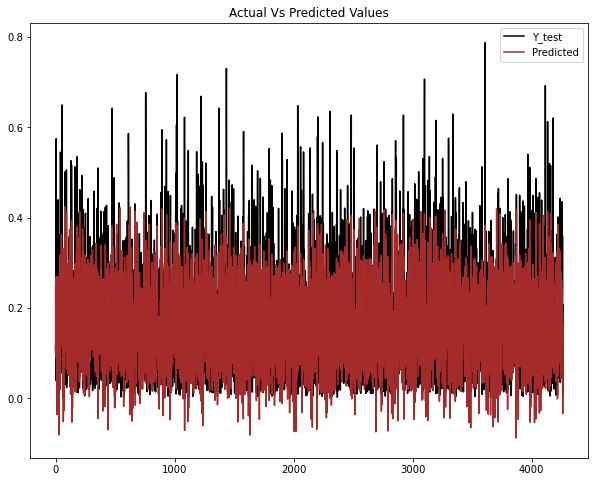

In [38]:
df_plot_lr.Y_test.plot(figsize = (10,8), legend = True, color = 'black')
df_plot_lr.Predicted.plot(legend = True, color = 'brown')
plt.title("Actual Vs Predicted Values")

#### Decision Tree Regressor

In [39]:
def rmsedt(score):
    rmsedt = np.sqrt(-score)
    print(f'rmse = {"{:.2f}".format(rmsedt)}')

In [40]:
kf = KFold(n_splits = 5, shuffle = False, random_state = None)
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18]  # hyper paramter tuning 

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth = val, random_state = 42), X, Y, cv = kf, scoring = 'neg_mean_squared_error')
    print(f'For max depth: {val}')
    rmsedt(score.mean())

For max depth: 1
rmse = 0.10
For max depth: 2
rmse = 0.09
For max depth: 3
rmse = 0.08
For max depth: 4
rmse = 0.07
For max depth: 5
rmse = 0.07
For max depth: 6
rmse = 0.07
For max depth: 7
rmse = 0.07
For max depth: 8
rmse = 0.07
For max depth: 9
rmse = 0.07
For max depth: 10
rmse = 0.07
For max depth: 11
rmse = 0.08
For max depth: 12
rmse = 0.08
For max depth: 13
rmse = 0.08
For max depth: 14
rmse = 0.08
For max depth: 15
rmse = 0.08
For max depth: 17
rmse = 0.09
For max depth: 18
rmse = 0.09


Maximum Depth = 4 is the optimum depth level of Regression Tree

In [41]:
dt = DecisionTreeRegressor(max_depth = 4, min_samples_split = 5, max_leaf_nodes = 10)

dt.fit(X_train, Y_train)
print("R-Squared value on train dataset =", round(dt.score(X_train, Y_train), 4))
dt.fit(X_test, Y_test)
print("R-Squared value of test dataset =", round(dt.score(X_test, Y_test), 4))

R-Squared value on train dataset = 0.6548
R-Squared value of test dataset = 0.6586


In [42]:
y_pred_d = dt.predict(X_test)
y_pred_d

array([0.29039081, 0.13203727, 0.13203727, ..., 0.06300709, 0.01468056,
       0.21487298])

In [43]:
MSE_dt = mean_squared_error(Y_test, y_pred_d)
MSE_dt

0.005085118674405641

In [44]:
RMSE_dt = np.sqrt(MSE_dt)
RMSE_dt

0.07131001805080153

In [45]:
rsqr2 = dt.score(X_train, Y_train)
rsqr2

0.6503837459059769

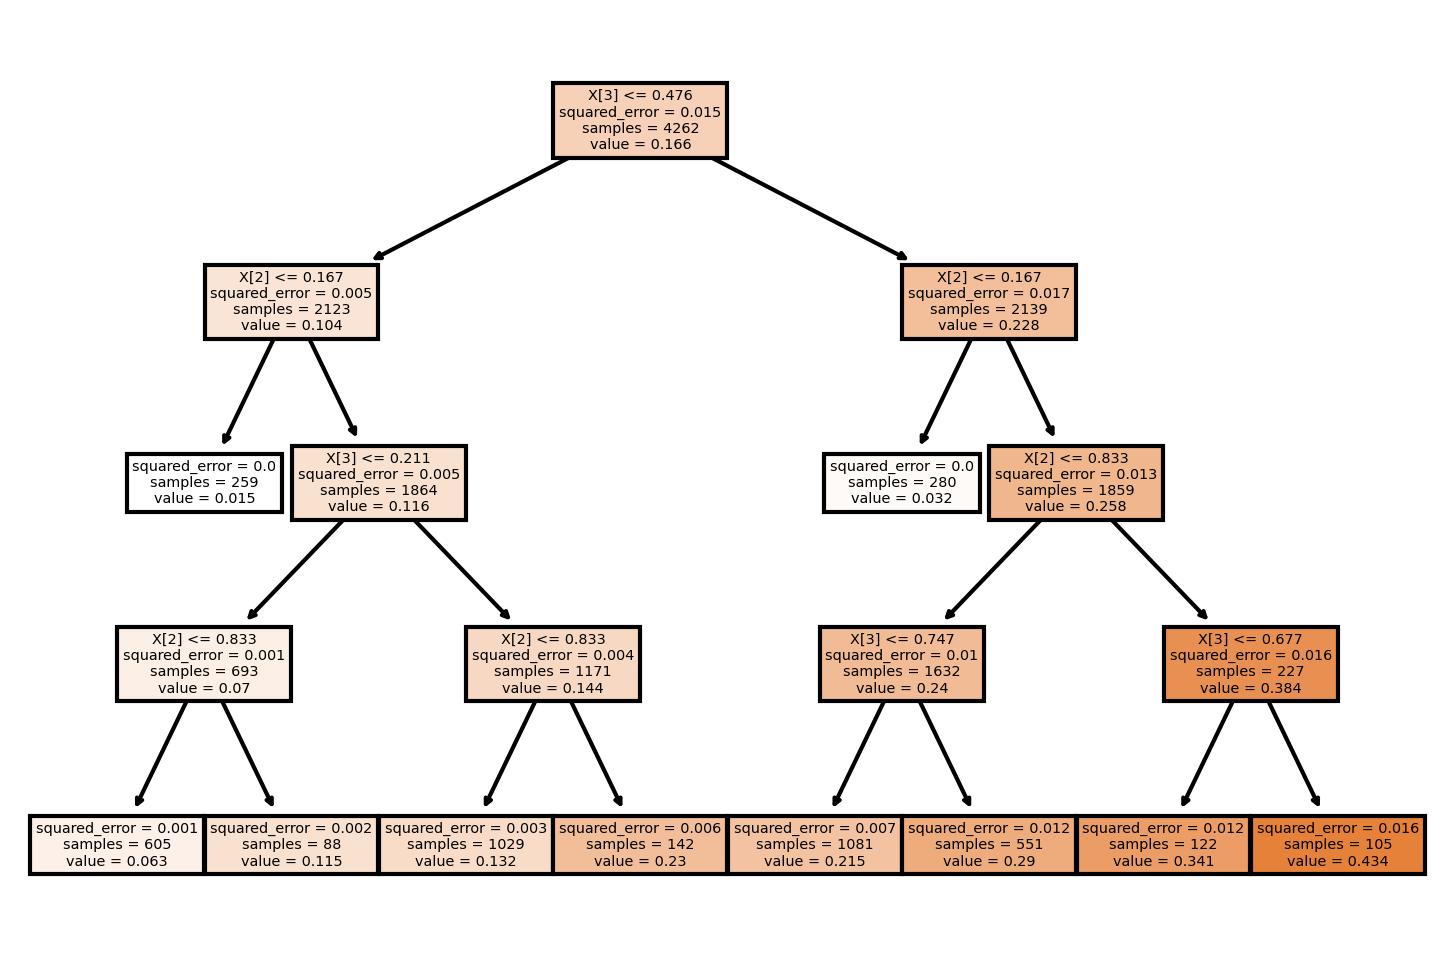

In [46]:
fig, ax = plt.subplots(dpi = 300)

tree.plot_tree(dt, filled = True);

# save figure in current directory as png
# fig.savefig('Store_regression_decisiontree.png')

In [47]:
df_plot_dt = pd.DataFrame({'Y_test':Y_test,'Predicted': y_pred_d})
df_plot_dt.head(10)

,Y_test,Predicted
0,0.116699,0.290391
1,0.105274,0.132037
2,0.169948,0.132037
3,0.169132,0.132037
4,0.254942,0.290391
5,0.574620,0.214873
6,0.039223,0.063007
7,0.083638,0.132037
8,0.259869,0.214873
9,0.073498,0.132037


Text(0.5, 1.0, 'Actual vs Predited values')

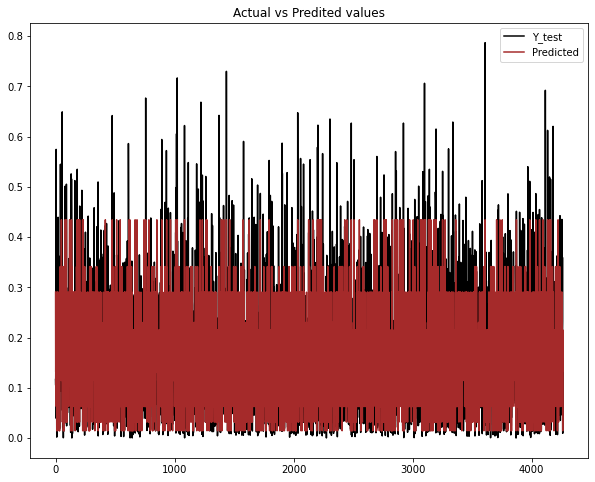

In [48]:
df_plot_dt.Y_test.plot(figsize = (10,8), legend = True, color = 'black')
df_plot_dt.Predicted.plot(legend = True, color = 'brown')
plt.title("Actual vs Predited values")

#### Random Forest Regressor

In [49]:
rfr = RandomForestRegressor(random_state = 13, n_jobs = -1)

In [50]:
params = {'max_depth':[2,5,10], 'min_samples_leaf':[5,10],'n_estimators':[10,25]}

In [51]:
grid_search = GridSearchCV(estimator = rfr, 
                           param_grid = params, 
                           cv = 4, 
                           n_jobs = -1, 
                           verbose = 1, 
                           scoring = 'neg_root_mean_squared_error')

In [52]:
%%time
grid_search.fit(X_train, Y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
CPU times: total: 453 ms
Wall time: 6.13 s


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [5, 10],
                         'n_estimators': [10, 25]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [53]:
# er_b

In [54]:
grid_search.best_score_

-0.0691102802093638

In [55]:
rfr_best = grid_search.best_estimator_
rfr_best

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=25,
                      n_jobs=-1, random_state=13)

In [56]:
rfrr = rfr.fit(X_train, Y_train)

In [57]:
y_pred_rfr = rfrr.predict(X_test)

In [58]:
MSE_rfr = mean_squared_error(Y_test, y_pred_rfr)
MSE_rfr

0.00557334395851727

In [59]:
RMSE_rfr = np.sqrt(MSE_rfr)
print("\nrandom forest MSE value :",MSE_rfr, "\nRMSE value :",RMSE_rfr)


random forest MSE value : 0.00557334395851727 
RMSE value : 0.0746548321176685


In [60]:
rsqr3 = rfrr.score(X_train, Y_train)
rsqr3

0.9478949041123917

In [61]:
df_plot_rfrr = pd.DataFrame({'Y_test' : Y_test, 'Predicted' : y_pred_rfr})
df_plot_rfrr

,Y_test,Predicted
0,0.116699,0.192275
1,0.105274,0.104957
2,0.169948,0.141936
3,0.169132,0.153704
4,0.254942,0.289302
...,...,...
4257,0.233102,0.164084
4258,0.359584,0.233689
4259,0.082097,0.067520
4260,0.009558,0.003433


Text(0.5, 1.0, 'Actual Vs Predicted Values')

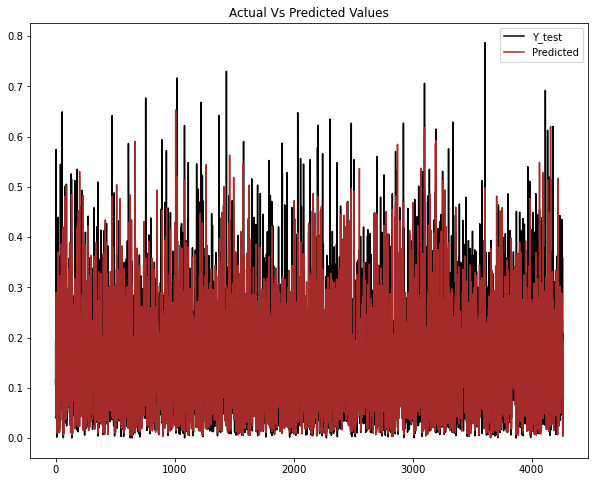

In [62]:
df_plot_rfrr.Y_test.plot(figsize = (10,8), legend = True, color = 'black')
df_plot_rfrr.Predicted.plot(legend = True, color = 'brown')
plt.title("Actual Vs Predicted Values")

#### Adaboost Regressor

In [63]:
model_ada = AdaBoostRegressor()

cv = KFold(n_splits = 5, shuffle = True, random_state = 1)
n_scores = cross_val_score(model_ada, X, Y, scoring = 'neg_mean_squared_error', cv = cv, n_jobs = -1, error_score = 'raise')

print('r2-score: mean:(%.3f), min:(%.3f), max:(%.3f), std:(%.3f)' %(mean(n_scores),min(n_scores),max(n_scores),np.std(n_scores)))
mean(-n_scores)*100

r2-score: mean:(-0.006), min:(-0.007), max:(-0.006), std:(0.000)


0.638252086433093

In [64]:
model_ada.fit(X_train, Y_train)
ada_score = model_ada.score(X_train, Y_train)
y_pred_adaboost = model_ada.predict(X_test)
MSE_ada = mean_squared_error(Y_test, y_pred_adaboost)
RMSE_ada = np.sqrt(MSE_ada)
print("MSE :",MSE_ada)
print("RMSE :",RMSE_ada)
print("Score :",ada_score)

MSE : 0.006629520114689695
RMSE : 0.08142186508972694
Score : 0.5615598472048401


In [65]:
rsqr3 =  model_ada.score(X_train, Y_train)
rsqr3

0.5615598472048401

In [66]:
df_plot_ada = pd.DataFrame({'Y_test':Y_test, 'Predicted':y_pred_adaboost})
df_plot_ada

,Y_test,Predicted
0,0.116699,0.276256
1,0.105274,0.163985
2,0.169948,0.182296
3,0.169132,0.184656
4,0.254942,0.279513
...,...,...
4257,0.233102,0.184656
4258,0.359584,0.276256
4259,0.082097,0.103973
4260,0.009558,0.079282


Text(0.5, 1.0, 'Actual Vs Predicted Values')

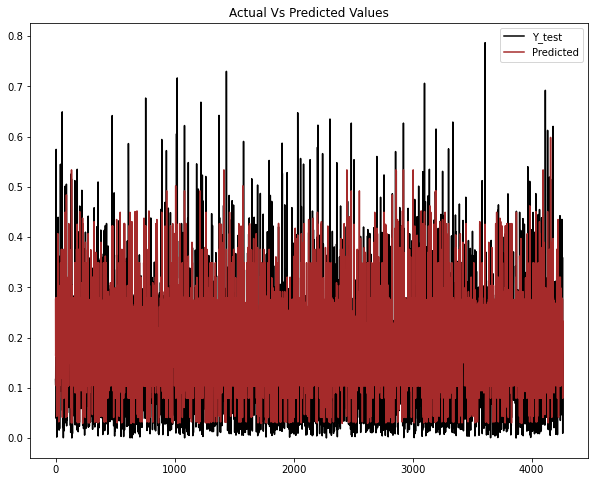

In [67]:
df_plot_ada.Y_test.plot(figsize = (10,8), legend = True, color = 'black')
df_plot_ada.Predicted.plot(legend = True, color = 'brown')
plt.title("Actual Vs Predicted Values")

RMSE for Linear Regression = 0.0816, RMSE for Decision Tree Regression = 0.0713, RMSE for Random Forest Regression = 0.07465, RMSE for Adaboost Regression = 0.0781

A low RMSE value indicates that the simulated and observed data are close to each other showing a better accuracy. Thus lower the RMSE better is model performance.

so from above RMSE values from different Models we can say that Decision Tree Regression has the Lowest RMSE value among all so the Decision Tree Regression is giving better performance among all.

In [68]:
print(RMSE)
print(RMSE_dt)
print(RMSE_rfr)
print(RMSE_ada)

0.08161777882009835
0.07131001805080153
0.0746548321176685
0.08142186508972694


In [69]:
RMSE_NAME = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Ada Boost Regressor']
RMSE_List = [RMSE, RMSE_dt, RMSE_rfr, RMSE_ada]

In [70]:
df_RMSE = pd.DataFrame(RMSE_NAME)
df_RMSE

,0
0,Linear Regression
1,Decision Tree Regression
2,Random Forest Regression
3,Ada Boost Regressor


In [71]:
df_RMSE['RMSE_Score'] = RMSE_List
df_RMSE

,0,RMSE_Score
0,Linear Regression,0.081618
1,Decision Tree Regression,0.071310
2,Random Forest Regression,0.074655
3,Ada Boost Regressor,0.081422


In [72]:
df_RMSE.columns = ['Model_Names', 'RMSE_score']
df_RMSE

,Model_Names,RMSE_score
0,Linear Regression,0.081618
1,Decision Tree Regression,0.071310
2,Random Forest Regression,0.074655
3,Ada Boost Regressor,0.081422


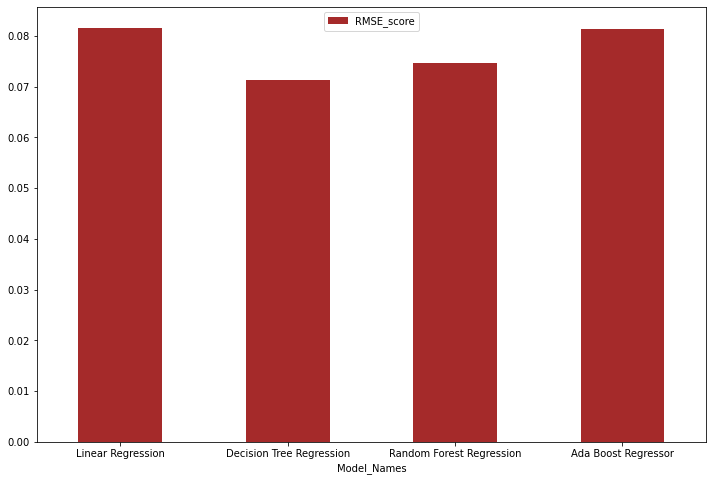

In [73]:
ax = df_RMSE.plot.bar(figsize = (12,8), x = 'Model_Names', y = 'RMSE_score', rot = 0, color = 'brown')

#### Conclusion 

RMSE for Linear Regression = 0.0816, RMSE for Decision Tree Regression = 0.0713, RMSE for Random Forest Regression = 0.07465, RMSE for Adaboost Regression = 0.0814

A low RMSE value indicates that the simulated and observed data are close to each other showing a better accuracy. Thus lower the RMSE better is model performance.

so from above RMSE values from different Models we can say that Decision Tree Regression has the Lowest RMSE value among all so the Decision Tree Regression is giving better performance among all.